<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

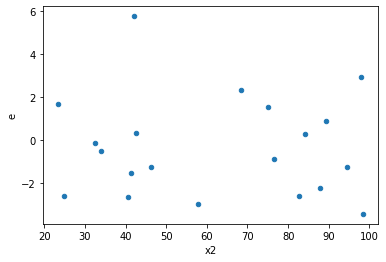

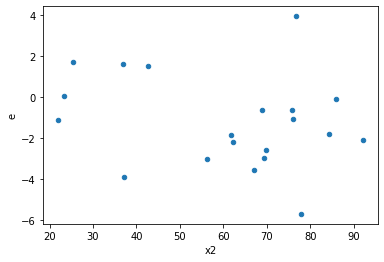

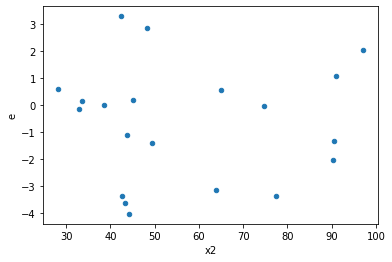

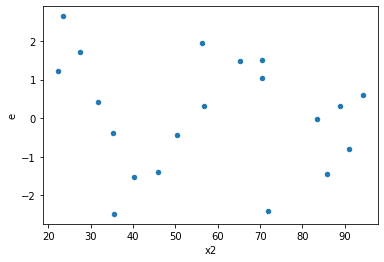

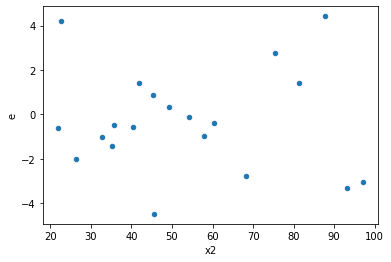

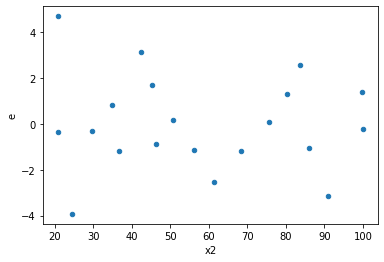

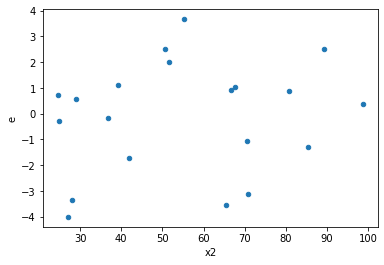

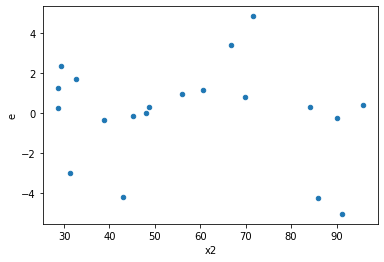

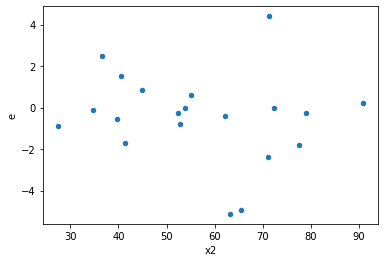

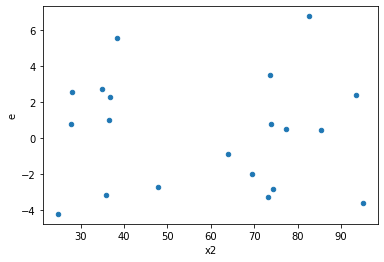

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,2.0,21.000395513728016,26.044403228237634,2.1000395513728014,13.022201614118817,6.200931599410197,0.2935295666344637,0.8532352166827681,0.14676478331723186,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,1.6701615595595156,46.47461500993211,0.4175403898898789,5.809326876241514,13.913209396996663,0.002244233907612969,0.9988778830461935,0.0011221169538064846,Reject001=0 : Heteroscedasticity
7.0,2.0,10.0,0.612864164434139,57.63171238819986,0.3064320822170695,5.763171238819986,18.80733635043307,0.0008171955232023631,0.9995914022383988,0.00040859776160118155,Reject001=0 : Heteroscedasticity
8.0,8.0,4.0,26.9058724365157,19.406884662907597,3.3632340545644626,4.851721165726899,1.4425761297053694,0.7655462844267789,0.6172268577866106,0.38277314221338943,Reject001=1 : Homoscedasticity
11.0,3.0,9.0,13.92550415017165,44.34546989427811,4.641834716723883,4.927274432697568,1.0614928650831288,0.8250225738869781,0.587488713056511,0.41251128694348904,Reject001=1 : Homoscedasticity
13.0,3.0,9.0,1.8732819637416982,60.83788907295138,0.6244273212472328,6.759765452550153,10.82554401855476,0.004844607814422863,0.9975776960927886,0.0024223039072114316,Reject001=0 : Heteroscedasticity
15.0,5.0,7.0,17.09686556239155,41.96601718111758,3.41937311247831,5.995145311588225,1.7532878438185515,0.482014249867625,0.7589928750661875,0.2410071249338125,Reject001=1 : Homoscedasticity
18.0,8.0,4.0,22.476312065495666,21.04120233439483,2.8095390081869582,5.260300583598707,1.8723002486423086,0.5698101837623895,0.7150949081188053,0.2849050918811947,Reject001=1 : Homoscedasticity
20.0,3.0,9.0,5.325072518420937,70.18874329388721,1.7750241728069789,7.798749254876357,4.393601717853572,0.07293866090451973,0.9635306695477401,0.03646933045225986,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,7.0,56.35229550883431,12.932764753927316,11.270459101766862,1.8475378219896166,0.16392746784378814,0.06369845269519367,Reject001=1 : Homoscedasticity
1.0,10.0,2.0,21.000395513728016,26.044403228237634,2.1000395513728014,13.022201614118817,6.200931599410197,0.2935295666344637,Reject001=1 : Homoscedasticity
2.0,5.0,7.0,35.50489937479645,21.587491400823243,7.1009798749592905,3.083927342974749,0.4342960263624785,0.3755855008222594,Reject001=1 : Homoscedasticity
3.0,13.0,1.0,24.20726331119198,9.693522803355793e-27,1.8620971777839985,9.693522803355793e-27,5.205701893008418e-27,1.084930570633553e-164,Reject001=0 : Heteroscedasticity
4.0,10.0,2.0,12.560353643418626,0.017872909457324927,1.2560353643418627,0.008936454728662464,0.007114811399713245,9.567339126723428e-08,Reject001=0 : Heteroscedasticity
5.0,7.0,5.0,49.23442638492652,9.073127475943927,7.033489483560932,1.8146254951887855,0.2579978969798747,0.10575314887880655,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,1.6701615595595156,46.47461500993211,0.4175403898898789,5.809326876241514,13.913209396996663,0.002244233907612969,Reject001=0 : Heteroscedasticity
7.0,2.0,10.0,0.612864164434139,57.63171238819986,0.3064320822170695,5.763171238819986,18.80733635043307,0.0008171955232023631,Reject001=0 : Heteroscedasticity
8.0,8.0,4.0,26.9058724365157,19.406884662907597,3.3632340545644626,4.851721165726899,1.4425761297053694,0.7655462844267789,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      783
Reject001=0 : Heteroscedasticity    217
Name: Result_test, dtype: int64